In [5]:
import load_data
import numpy as np
from PIL import Image
from os.path import join
from os import makedirs

In [6]:
train_img = load_data.load_images_in_path("../AerialImageDataset/train/images")
train_gt = load_data.load_images_in_path("../AerialImageDataset/train/gt")

In [63]:
print(len(train_img))

180


In [7]:
def dict_to_sorted_list(images):
    return sorted(images.items(), key=lambda t: t[0]) #sort by name

In [8]:
sorted_train_img = dict_to_sorted_list(train_img)
sorted_train_gt = dict_to_sorted_list(train_gt)

In [9]:
split_size = 5

In [93]:
def insert_num_img_name(name, idx):
    s = name.split('.')
    return s[0] + "_" + str(idx).zfill(2) + ".jpg"

In [94]:
def split_one_image(image, split_size):
    name = image[0]
    pil_img = image[1]
    np_img = np.asarray(pil_img)
    tmp1 = np.split(np_img, split_size, axis=0) # assume image is shape = (W, H, C)
    tmp2 = []
    for i in tmp1:
        tmp2 += np.split(i, split_size, axis=1)
    if len(np.array(tmp2).shape) == 5:
        return [(insert_num_img_name(name, i), np.mean(arr,axis=2)) for i, arr in enumerate(tmp2)]
    else: return [(insert_num_img_name(name, i), arr) for i, arr in enumerate(tmp2)]

In [35]:
imgs = split_one_image(sorted_train_img[0], split_size)
gts = split_one_image(sorted_train_gt[0], split_size)

(25, 1000, 1000, 3)
(25, 1000, 1000)


## Test

In [36]:
from matplotlib.pyplot import imshow

255.0


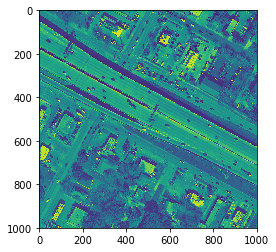

In [91]:
imshow(imgs[0][1])
fst_img=imgs[0][1]
print(fst_img.max())
Image.fromarray(fst_img).convert('L').save("tmp_img.jpg","JPEG",optimize=True)

(1000, 1000)


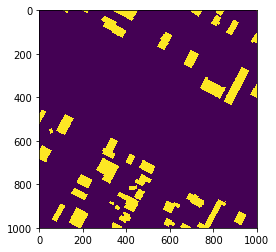

In [70]:
imshow(gts[0][1])
print(gts[0][1].shape)
fst_gt=gts[0][1]
Image.fromarray(fst_gt).save("tmp_gt.jpg", "JPEG")

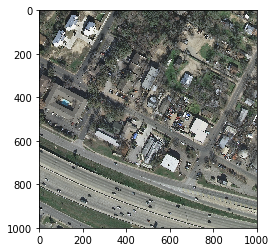

In [19]:
imshow(imgs[1][1])

## Sauvegarde des nouvelles images

In [97]:
def save_files(path, to_save):
    for n,img in to_save:
        Image.fromarray(img).convert('L').save(join(path,n)) # Grayscale
        #Image.fromarray(img).save(join(path,n)) #RGB

In [85]:
def split_save_imgs(path, img_tuple_list, split_size, num_splits, batch):
    res = []
    data_tosplit = int(len(img_tuple_list)/num_splits)
    index = [batch * data_tosplit, min(len(img_tuple_list)-1, (batch + 1) * data_tosplit)]
    print(data_tosplit)
    print(index)
    for j in range(index[0], index[1]):
        save_files(path, split_one_image(img_tuple_list[j], split_size))


In [98]:
# dir_splitted_img = "../splitted_dataset/train/images_splitted"
dir_splitted_img = "../img_split_grayscale"
# dir_splitted_gt = "../splitted_dataset/train/gt_splitted"
dir_splitted_gt = "../gt_split"

#makedirs(dir_splitted_img)
#makedirs(dir_splitted_gt)

split_save_imgs(dir_splitted_img, sorted_train_img, split_size, 10, 0)
#split_save_imgs(dir_splitted_gt, sorted_train_gt, split_size, 10, 4)

18
[0, 18]
